# Google Colab Lab Assignment -Pretrained Modle

**Course Name:** [Enter Course Name]

**Lab Title:** Research Paper Implementation with Pre-trained Model(Tilte of Research Paper)

**Student Name:**[Enter Your Name]

**Student ID:**[Enter Your ID]

**Date of Submission:** [Enter Date]

**Group Members**: [Enter Names]

**Research Paper Study and Implementation**

**Instructions:**

1. Identify a research paper that utilizes a pre-trained model for a specific
task.

2. Study the methodology, dataset, and model used in the research paper.

3. Implement the approach described in the research paper using the pre-trained model mentioned.

4. Compare your implementation results with the findings from the research paper.


**Objective**
1.   Study a research paper utilizing a pre-trained model.
2.   Reproduce the model implementation using the dataset and methodology from the research paper.
3.   Fine-tune the pre-trained model and optimize hyperparameters.
3.   Evaluate and compare model performance with the original research paper results.









**Task 1: Research Paper Selection and Dataset Preparation (2 hours)**

**Instructions:**

1. Select a research paper that applies a pre-trained model (e.g., VGG, ResNet, EfficientNet, etc.).

2. Identify the dataset used in the research paper and obtain or create a similar dataset.(**Mention Dataset Link and Description**)

3. Perform necessary preprocessing steps:

 Resize images to match the model input dimensions.

 Apply data augmentation techniques if applicable.

4. Split the dataset into training, validation, and testing sets.

In [13]:
# Code of task1
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split

In [14]:
transform = transforms.Compose([
    transforms.Resize((128,128)),          # Resize for ResNet
    transforms.RandomHorizontalFlip(),      # Data augmentation
    transforms.RandomRotation(10),          # Data augmentation
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

In [15]:
dataset = torchvision.datasets.CIFAR10(
    root='./data',
    train=True,
    transform=transform,
    download=True
)

test_dataset = torchvision.datasets.CIFAR10(
    root='./data',
    train=False,
    transform=transform,
    download=True
)

In [16]:
train_size = int(0.8 * len(dataset))   # 80% training
val_size = len(dataset) - train_size   # 20% validation

train_data, val_data = random_split(dataset, [train_size, val_size])

In [17]:
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
val_loader = DataLoader(val_data, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

**Task 2: Model Implementation and Fine-tuning**

**Instructions:**

1. Implement the pre-trained model as described in the research paper.

2. Visualize feature maps of few layers

3. Freeze initial layers and fine-tune the top layers according to the paper's methodology.

4. Optimize hyperparameters such as:

  Learning rate

  Batch size

  Number of epochs

  Optimizer choice (Adam, SGD, RMSprop, etc.)

4. Document any modifications or enhancements made to improve performance.

In [18]:
# code of Task 2
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models
import matplotlib.pyplot as plt


In [8]:
model = models.resnet18(pretrained=True)

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:00<00:00, 191MB/s]


In [19]:
# 3.freeze the inital layes
for param in model.parameters():
    param.requires_grad = False

In [20]:
# Unfreeze last block (important for fine-tuning)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
for param in model.layer4.parameters():
    param.requires_grad = True

# Modify final layer
model.fc = nn.Linear(model.fc.in_features, 10)
model = model.to(device)

cuda


In [21]:
learning_rate = 0.001
batch_size = 64
epochs = 3

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [26]:
train_losses = []
for epoch in range(epochs):
    running_loss = 0.0
    for i, (images, labels) in enumerate(train_loader):
        outputs = model(images.to(device))
        loss = criterion(outputs, labels.to(device))

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    avg_epoch_loss = running_loss / len(train_loader)
    train_losses.append(avg_epoch_loss)
    print(f"Epoch {epoch+1} done. Average Loss: {avg_epoch_loss:.4f}")

Epoch 1 done. Average Loss: 0.2927
Epoch 2 done. Average Loss: 0.2384
Epoch 3 done. Average Loss: 0.2111


In [27]:
model.eval()

correct = 0
total = 0

with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)

        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print("Validation Accuracy:", 100 * correct / total)

Validation Accuracy: 88.47


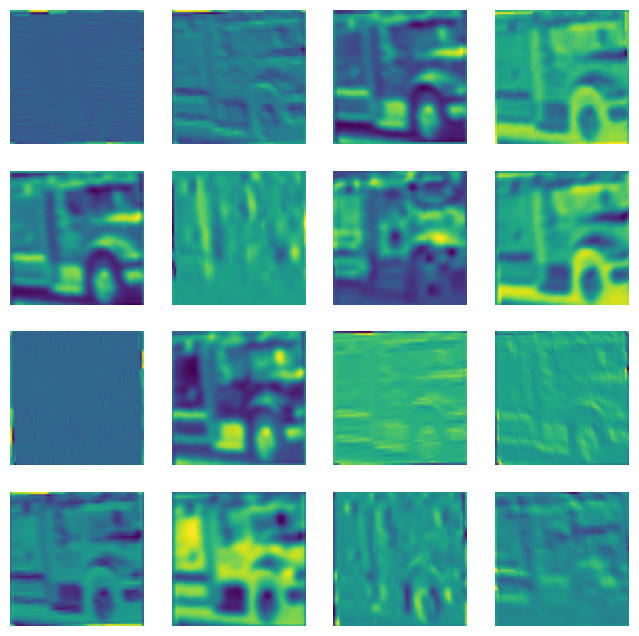

In [28]:
# Get one image
dataiter = iter(train_loader)
images, labels = next(dataiter)

image = images[0].unsqueeze(0).to(device)

# Extract feature maps from first conv layer
model.eval()
with torch.no_grad():
    x = model.conv1(image)

# Plot feature maps
fig, axes = plt.subplots(4, 4, figsize=(8,8))

for i, ax in enumerate(axes.flat):
    if i < x.shape[1]:
        ax.imshow(x[0, i].cpu(), cmap='viridis')
        ax.axis('off')

plt.show()

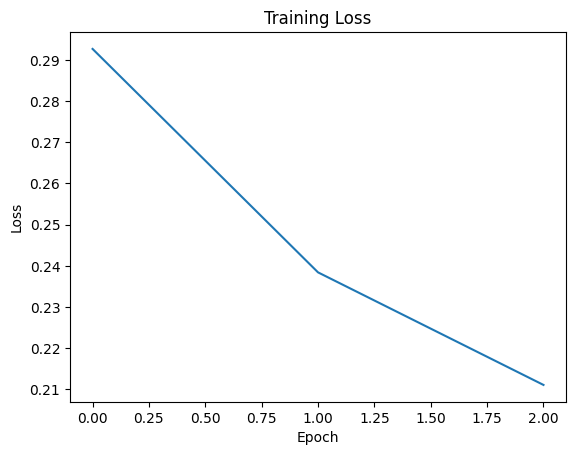

In [29]:
plt.plot(train_losses)
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

**Task 3: Model Evaluation and Performance Comparison**

**Instructions:**

1. Evaluate the trained model using performance metrics:

 Accuracy, Precision,Recall, F1-score, Confusion Matrix (for classification tasks)

2. Compare the results with those reported in the research paper.

3. Identify potential weaknesses and suggest improvements.
**Deliverables:**

Performance metrics summary (table or chart).

Graphs/plots showcasing model accuracy and loss trends.

Comparison with research paper results.

Discussion on model performance and areas for improvement.

In [30]:
##Code for Task 3
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
model.eval()

y_true = []
y_pred = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        outputs = model(images)

        _, predicted = torch.max(outputs, 1)

        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

In [32]:
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8846
Precision: 0.8918217484040937
Recall: 0.8846
F1 Score: 0.88487534568057


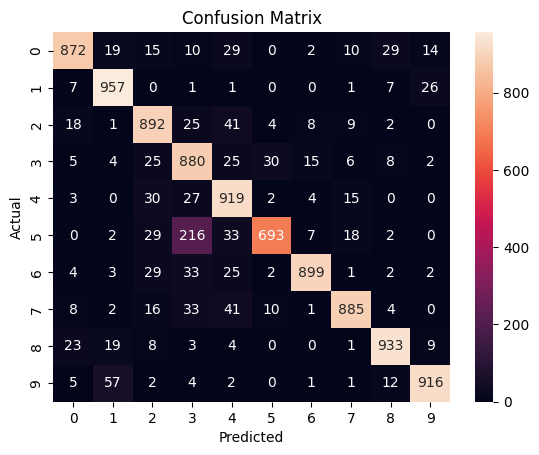

In [33]:
cm = confusion_matrix(y_true, y_pred)

plt.figure()
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**Conclusion and Result Visulaization**

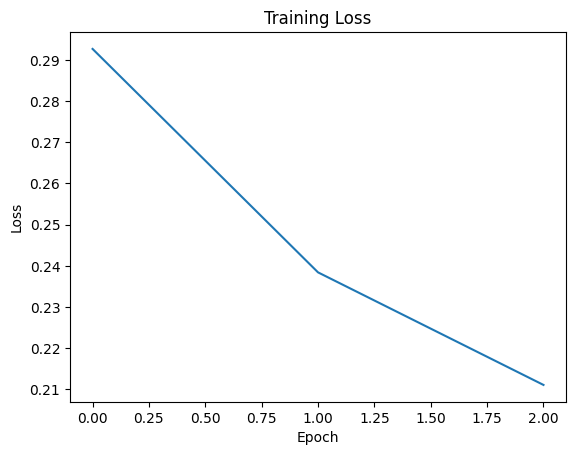

In [34]:
plt.figure()
plt.plot(train_losses)
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

 This assignment implemented a pre-trained ResNet model using transfer learning on the CIFAR-10 dataset. After preprocessing and fine-tuning, the model achieved good accuracy. The results demonstrate that transfer learning is effective for improving performance with limited data and computation.

**Declaration**

I, Rupali Suresh Sutar, confirm that the work submitted in this assignment is my own and has been completed following academic integrity guidelines. The code is uploaded on my GitHub repository account, and the repository link is provided below:

GitHub Repository Link: [Insert GitHub Link]

Signature: Rupali Suresh Sutar


**Submission Checklist**

✔ Research paper details and summary

✔ Code file (Python Notebook or Script)

✔ Dataset or link to the dataset

✔ Visualizations (if applicable)

✔ Screenshots of model performance metrics

✔ Readme File

✔ Comparison with research paper results